In [1]:
# function for creating random graph

def init_graph():
    import networkx as nx
    g=nx.Graph()
    g.add_nodes_from([0,1])
    g.add_edge(0,1)
    return g
    
def sf_enlarge(graph,nm_iter):
    import random as rnd
    for i in range(nm_iter):
        selected_edge_num=rnd.randrange(0, len(list(graph.edges)) ) 
        selected_node_coord=rnd.randrange(0,2)
        selected_node=list(graph.edges)[selected_edge_num][selected_node_coord]

        new_node=len(list(graph.nodes))
        new_edge=(selected_node,new_node)
        graph.add_node(new_node)
        graph.add_edge(*new_edge)

In [7]:
sf_graph100=init_graph()
sf_enlarge(sf_graph100,99)

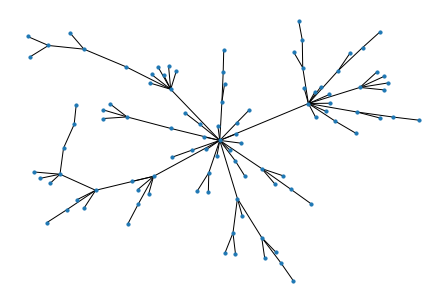

In [10]:
import networkx as nx
nx.draw(sf_graph100,node_size=10)

In [11]:
# size 5000
sf_test1=init_graph()
sf_enlarge(sf_test1,4999)

In [30]:
# function for getting degree list
def deg_list(g):
    ls=[]
    ln=len(list(g.nodes))
    for i in range(ln):
        ls.append(g.degree[i])
    return ls

# function for getting average of degree from graph

def ave_deg(g):
    return sum(deg_list(g))/len(deg_list(g))

In [31]:
# minimun and maximum value of degrees
deg_list_sf_test1=deg_list(sf_test1)
[min(deg_list_sf_test1),max(deg_list_sf_test1)]

[1, 106]

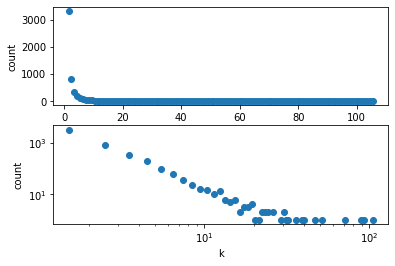

In [32]:
import matplotlib.pyplot as plt

# draw distribution of degree

def draw_distribution(ls):
    import numpy as np
    histo_data=np.histogram(ls,bins=max(ls))
    X = []
    for i in range(1, len(histo_data[1])):
        X.append((histo_data[1][i-1]+histo_data[1][i])/2)
    plt.plot(X,histo_data[0],'o')
    plt.xlabel("k")
    plt.ylabel("count")

# log scale ver
    
def draw_distribution_log(ls):
    import numpy as np
    histo_data=np.histogram(ls,bins=max(ls))
    X = []
    for i in range(1, len(histo_data[1])):
        X.append((histo_data[1][i-1]+histo_data[1][i])/2)
    plt.plot(X,histo_data[0],'o')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("k")
    plt.ylabel("count")
    

plt.subplot(211)
draw_distribution(deg_list_sf_test1)
plt.subplot(212)
draw_distribution_log(deg_list_sf_test1)


# Part 5 Power-laws and the friendship paradox

In [20]:
#comparing degree of a certain random point to its neighbor,iter_num is the number of trials
def random_neighbor_degree_comparing(graph,iter_num):
    import random as rnd
    import networkx as nx
    list_neighbor_ave=[]
    for i in range(iter_num):
        selected_node=rnd.choice( list(graph.nodes) )
        ave=0
        if graph.degree(i) != 0:
            for j in list(graph.neighbors(selected_node)):
                ave+=graph.degree(j)
            ave/=graph.degree(i)
        list_neighbor_ave.append((selected_node,ave,graph.degree(i)))
    return list_neighbor_ave

# tcalculating the percentage of how many nodes the claim is true for
def num_of_paradox(ls):
    paradox_list=[]
    for result in ls:
        if result[1]>result[2]:
            paradox_list.append(result)
    return (paradox_list,len(paradox_list)/len(ls))

In [21]:
# the last entry of below list is the percentage. num of trial is 3000.
list_comp=random_neighbor_degree_comparing(sf_test1,3000)
num_of_paradox(list_comp)

([(3311, 7.0, 1),
  (383, 5.75, 4),
  (4411, 3.0, 1),
  (680, 11.25, 8),
  (440, 38.666666666666664, 3),
  (793, 14.0, 1),
  (389, 5.0, 3),
  (3337, 8.0, 1),
  (269, 20.0, 1),
  (3520, 11.5, 2),
  (3977, 8.5, 2),
  (1784, 4.5, 4),
  (4622, 2.0, 1),
  (268, 23.25, 4),
  (266, 31.0, 1),
  (4444, 3.0, 1),
  (1246, 2.5, 2),
  (1263, 41.0, 1),
  (3295, 7.833333333333333, 6),
  (2414, 4.0, 1),
  (4, 19.5, 2),
  (834, 7.166666666666667, 6),
  (3725, 7.0, 1),
  (777, 2.0, 1),
  (618, 4.333333333333333, 3),
  (645, 14.5, 2),
  (318, 4.0, 1),
  (4514, 7.5, 2),
  (278, 6.0, 3),
  (3755, 46.5, 2),
  (287, 54.5, 2),
  (3561, 18.6, 5),
  (670, 13.0, 3),
  (4111, 7.0, 1),
  (257, 92.0, 1),
  (1514, 31.0, 1),
  (3088, 2.0, 1),
  (1521, 3.0, 1),
  (1795, 6.0, 1),
  (3170, 4.0, 1),
  (20, 63.0, 2),
  (583, 6.333333333333333, 3),
  (265, 18.0, 1),
  (2618, 24.0, 3),
  (18, 17.77777777777778, 9),
  (1060, 3.5, 2),
  (2735, 3.0, 1),
  (293, 16.0, 3),
  (2275, 4.0, 1),
  (995, 10.25, 4),
  (3661, 4.0, 1),
 

In [23]:
# calculating the percentage(Friendship paradox) for same size and probability ER network.
random_test1=nx.erdos_renyi_graph(5000,ave_deg(sf_test1)/5000)
list_comp_rand=random_neighbor_degree_comparing(random_test1,3000)
num_of_paradox(list_comp_rand)

([(4774, 3.3333333333333335, 3),
  (4221, 12.0, 1),
  (3680, 4.0, 1),
  (3425, 12.0, 1),
  (2480, 3.0, 1),
  (972, 3.5, 2),
  (749, 11.0, 1),
  (3167, 9.0, 1),
  (278, 3.5, 2),
  (3961, 2.0, 1),
  (3822, 3.0, 1),
  (1546, 6.0, 2),
  (3880, 5.0, 1),
  (3898, 4.0, 1),
  (4687, 13.0, 1),
  (3680, 4.0, 1),
  (2554, 8.0, 1),
  (639, 13.0, 1),
  (885, 3.3333333333333335, 3),
  (1687, 6.0, 1),
  (4708, 2.0, 1),
  (3821, 14.0, 1),
  (2538, 4.0, 1),
  (4237, 10.0, 1),
  (703, 9.0, 1),
  (2727, 6.5, 4),
  (1555, 8.0, 1),
  (1175, 4.5, 2),
  (4095, 3.5, 2),
  (1993, 3.0, 1),
  (1503, 3.3333333333333335, 3),
  (3862, 2.0, 1),
  (1056, 3.3333333333333335, 3),
  (507, 3.0, 2),
  (1933, 2.5, 2),
  (1379, 20.0, 1),
  (2844, 5.0, 2),
  (994, 2.5, 2),
  (4084, 5.0, 1),
  (4366, 4.0, 1),
  (951, 7.0, 3),
  (1986, 8.0, 2),
  (61, 3.3333333333333335, 3),
  (2597, 8.0, 1),
  (4789, 3.0, 2),
  (3053, 10.0, 1),
  (1877, 10.0, 1),
  (2973, 2.5, 2),
  (1405, 4.5, 2),
  (2369, 4.0, 1),
  (4762, 4.5, 2),
  (4947,

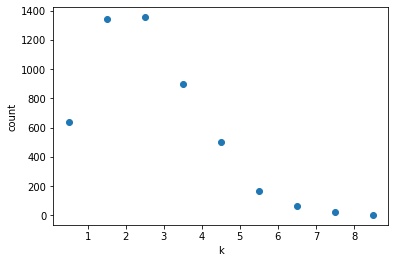

In [33]:
#  distribution of degree of random network
draw_distribution(deg_list(random_test1))

In [34]:
# the number of clusters of random network
nx.number_connected_components(random_test1)

759

In [35]:
# the number of clusters of BA network
nx.number_connected_components(sf_test1)

1

From the above, we can get 3 results.
First is that the degrees of random network are in narrow span but BA network's are in wide range, i.e. the standard variation of BA network is larger than random network.

Secound is that the number of connected component is large in random network, therefore the entire graph is separated into a lot of subcomponent. However, BA network has only one component, i.e. the all nodes in the graph are connected to one large component.

Finally, we can get Friendship_paradox is more true in BA network than random network.